In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import cv2
import glob
import shutil
import numpy as np
import matplotlib.pyplot as plt

# Uploading all FAKE images to one folder named -> combined_images

In [4]:
fake_path = 'techosmotr/techosmotr/train/fictivniye(fictitious)'
folders = ['1-not-on-the-brake-stand', '2-from-the-screen', '3-from-the-screen+photoshop', '4-photoshop']
destination_folder = 'techosmotr/techosmotr/train/fictivniye(fictitious)/combined_images'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

if not os.path.exists(fake_path + '/' + folders[0]):
    pass
else:
    for folder in folders:
        source_folder = os.path.join(fake_path, folder)

        for filename in os.listdir(source_folder):
            source_file = os.path.join(source_folder, filename)
            destination_file = os.path.join(destination_folder, filename)
            shutil.copy(source_file, destination_file)

        shutil.rmtree(source_folder)

In [5]:
fake_path = 'techosmotr/techosmotr/train/fictivniye(fictitious)/combined_images'
fake = os.listdir(fake_path)
len(fake)

2062

# Uploading all TRUE images

In [6]:
true_path = 'techosmotr/techosmotr/train/pravilniye(correct)/0-correct'
true = os.listdir(true_path)
len(true)

4523

In [7]:
total_train = len(fake) + len(true)

total_train

6585

# Pre-process image from to optimal shape

In [8]:
IMG_SHAPE  = 256
BATCH_SIZE = 100

In [9]:
def reshaping(source_file):
    image = cv2.imread(source_file)
    size = IMG_SHAPE  # Assuming IMG_SHAPE is a predefined constant for the desired image size

    # Resize the cropped image to the desired size
    image = cv2.resize(image, (size, size))
    
    image = image.astype('float32') / 255.0
    
    return image

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Create another folder with next directories

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>data</b>
|__ <b>train</b>
    |______ <b>true</b>: [true.0.jpg, true.1.jpg, true.2.jpg ....]
    |______ <b>fake</b>: [fake.0.jpg, fake.1.jpg, fake.2.jpg ...]
|__ <b>validation</b>
    |______ <b>true</b>: [true.2000.jpg, true.2001.jpg, true.2002.jpg ....]
    |______ <b>fake</b>: [fake.2000.jpg, fake.2001.jpg, fake.2002.jpg ...]
</pre>

# train/true

In [11]:
folder_path = 'techosmotr/techosmotr/train/pravilniye(correct)/0-correct'
destination_folder = 'data/train/true'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for filename in os.listdir(folder_path)[:int(len(true) * 0.8)]:
    file_path = os.path.join(folder_path, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    
    cv2.imwrite(destination_path, reshaping(file_path) * 255)    

# train/fake

In [12]:
folder_path = 'techosmotr/techosmotr/train/fictivniye(fictitious)/combined_images'
destination_folder = 'data/train/fake'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for filename in os.listdir(folder_path)[:int(len(fake) * 0.8)]:
    file_path = os.path.join(folder_path, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    
    cv2.imwrite(destination_path, reshaping(file_path) * 255)   

# validation/true

In [13]:
folder_path = 'techosmotr/techosmotr/train/pravilniye(correct)/0-correct'
destination_folder = 'data/validation/true'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for filename in os.listdir(folder_path)[int(len(true) * 0.8):]:
    file_path = os.path.join(folder_path, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    
    cv2.imwrite(destination_path, reshaping(file_path) * 255)    

# validation/fake

In [14]:
folder_path = 'techosmotr/techosmotr/train/fictivniye(fictitious)/combined_images'
destination_folder = 'data/validation/fake'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

for filename in os.listdir(folder_path)[int(len(fake) * 0.8):]:
    file_path = os.path.join(folder_path, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    
    cv2.imwrite(destination_path, reshaping(file_path) * 255)   

In [15]:
num_fake_tr = len(os.listdir('data/train/fake'))
num_true_tr = len(os.listdir('data/train/true'))

num_fake_val = len(os.listdir('data/validation/fake'))
num_true_val = len(os.listdir('data/validation/true'))

total_train = num_fake_tr + num_true_tr
total_val = num_fake_val + num_true_val

In [16]:
print('total training fake images:', num_fake_tr)
print('total training true images:', num_true_tr)

print('total validation fake images:', num_fake_val)
print('total validation true images:', num_true_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training fake images: 1649
total training true images: 3618
total validation fake images: 413
total validation true images: 905
--
Total training images: 5267
Total validation images: 1318


In [17]:
train_dir = 'data/train'
validation_dir = 'data/validation'

# Data Augmentation

In [18]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 5267 images belonging to 2 classes.


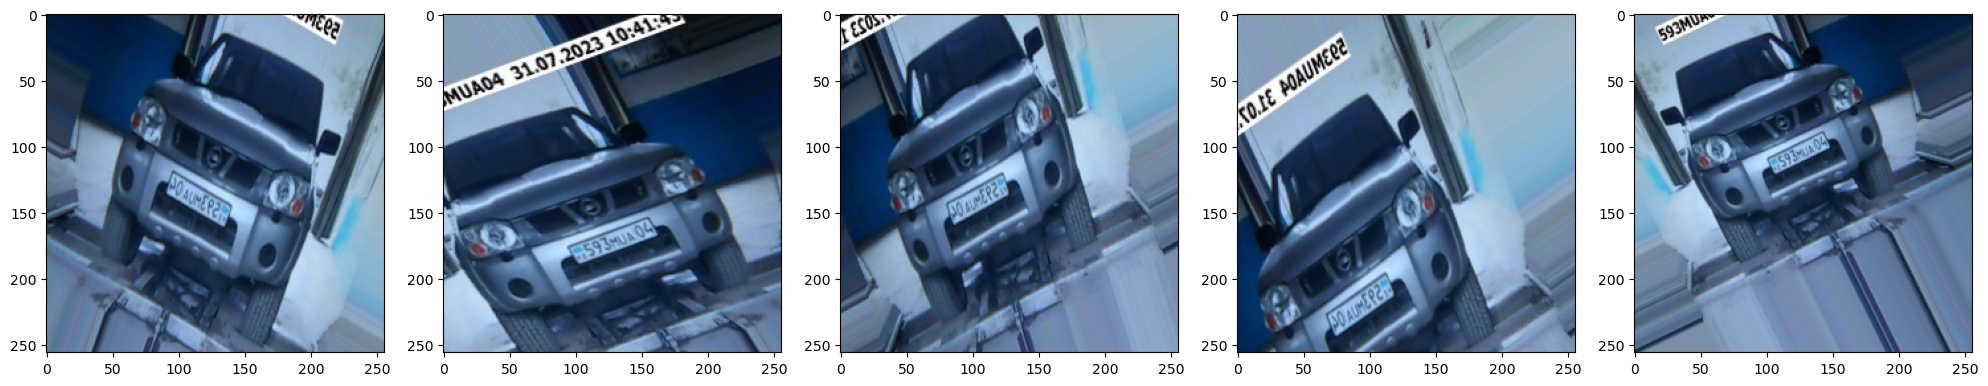

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Creating Validation Data generator

In [20]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1318 images belonging to 2 classes.


# Creating model

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/var/folders/9p/vfj51s1x3f7gl6dvkpvb09mm0000gn/T/ipykernel_23612/808446090.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
53/53 [==============================] - 170s 3s/step - loss: 0.4537 - accuracy: 0.7978 - val_loss: 0.3469 - val_accuracy: 0.8498
Epoch 2/100
53/53 [==============================] - 173s 3s/step - loss: 0.3909 - accuracy: 0.8287 - val_loss: 0.2897 - val_accuracy: 0.8824
Epoch 3/100
53/53 [==============================] - 180s 3s/step - loss: 0.3464 - accuracy: 0.8534 - val_loss: 0.2850 - val_accuracy: 0.8794
Epoch 4/100
53/53 [==============================] - 1239s 24s/step - loss: 0.3192 - accuracy: 0.8669 - val_loss: 0.3354 - val_accuracy: 0.8642
Epoch 5/100
53/53 [==============================] - 2141s 41s/step - loss: 0.3071 - accuracy: 0.8684 - val_loss: 0.2817 - val_accuracy: 0.8824
Epoch 6/100
53/53 [==============================] - 1195s 23s/step - loss: 0.3497 - accuracy: 0.8489 - val_loss: 0.3946 - val_accuracy: 0.8407
Epoch 7/100
53/53 [==============================] - 1065s 20s/step - loss: 0.2742 - accuracy: 0.8844 - val_loss: 0.3263 - val_accuracy: 0.888

KeyboardInterrupt: 

# Test

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('sample_submission.csv')
df['class'] = None
df

In [ ]:
for i in range(len(df['file_index'])):
    path = 'techosmotr/techosmotr/test/' + str(df.iloc[i, 0]) + '.jpeg'
    image = reshaping(path)
    image = image.reshape(1, 512, 512, 3)
    predictions = model.predict(image)
    df.iloc[i, 1] = 1 - np.argmax(predictions, axis=1)[0]

In [ ]:
df

In [ ]:
sum(df['class'])

In [ ]:
df.to_csv('result.csv', index=False) 

In [ ]:
2062/6585

In [ ]:
166/777